In [1]:
#installing pandas datareader
#!pip install pandas-datareader

In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [3]:
#!pip install yfinance

In [4]:
import yfinance as yf

# Define the stock symbol and the date range
symbol = 'AAPL'
start_date = '2021-08-18'
end_date = '2023-07-17'

# Retrieve the stock data from Yahoo Finance
data = yf.download(symbol, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-18,149.800003,150.720001,146.149994,146.360001,144.881485,86326000
2021-08-19,145.029999,148.000000,144.500000,146.699997,145.218048,86960300
2021-08-20,147.440002,148.500000,146.779999,148.190002,146.692978,60549600
2021-08-23,148.309998,150.190002,147.889999,149.710007,148.197647,60131800
2021-08-24,149.449997,150.860001,149.149994,149.619995,148.108536,48606400


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-10,189.259995,189.990005,187.039993,188.610001,188.610001,59922200
2023-07-11,189.160004,189.300003,186.600006,188.080002,188.080002,46638100
2023-07-12,189.679993,191.699997,188.470001,189.770004,189.770004,60750200
2023-07-13,190.500000,191.190002,189.779999,190.539993,190.539993,41342300
2023-07-14,190.229996,191.179993,189.630005,190.690002,190.690002,41573900


<AxesSubplot:xlabel='Date'>

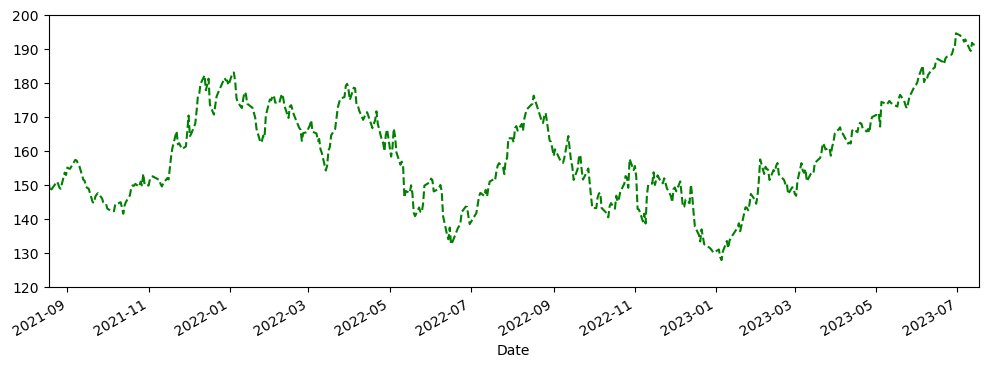

In [7]:
data['High'].plot(xlim=['2021-08-18','2023-07-17'],ylim=[120,200],figsize=(12,4),ls='--',c='green')

In [8]:
index = data.loc['2022-07-05':'2023-07-14'].index
stock_open = data.loc['2022-07-05':'2023-07-14']['Open']
stock_high = data.loc['2022-07-05':'2023-07-14']['High']
stock_low = data.loc['2022-07-05':'2023-07-14']['Low']
stock_close = data.loc['2022-07-05':'2023-07-14']['Close']

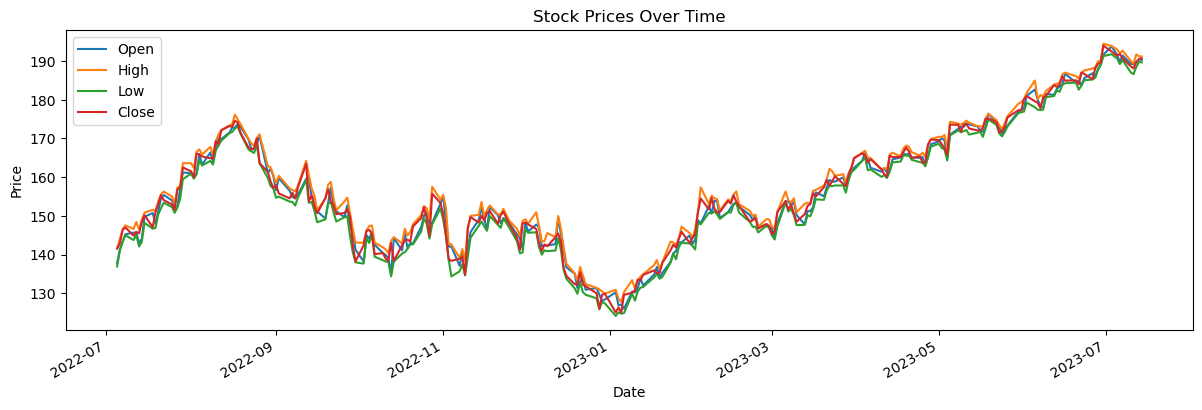

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

figure, axis = plt.subplots(figsize=(12,4))
plt.tight_layout()
# preventing overlapping
figure.autofmt_xdate()

# assuming 'index', 'stock_open', 'stock_high', 'stock_low', 'stock_close' are defined
axis.plot(index, stock_open, label='Open')
axis.plot(index, stock_high, label='High')
axis.plot(index, stock_low, label='Low')
axis.plot(index, stock_close, label='Close')

# Add labels and title
axis.set_xlabel('Date')
axis.set_ylabel('Price')
axis.set_title('Stock Prices Over Time')

# Add a legend
axis.legend()

plt.show()


In [10]:
df1 = stock_open

In [11]:
df1

Date
2022-07-05    137.770004
2022-07-06    141.350006
2022-07-07    143.289993
2022-07-08    145.259995
2022-07-11    145.669998
                 ...    
2023-07-10    189.259995
2023-07-11    189.160004
2023-07-12    189.679993
2023-07-13    190.500000
2023-07-14    190.229996
Name: Open, Length: 259, dtype: float64

In [12]:
# Calculate the split point
split_point = int(len(df1) * 0.8)

# Split the data
train_data = df1.iloc[:split_point]
test_data = df1.iloc[split_point:]

# Print the shapes of the training and testing sets
print("Training set shape:", train_data.shape)
print("Testing set shape:", test_data.shape)


Training set shape: (207,)
Testing set shape: (52,)


In [13]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_data_scaled=scaler.fit_transform(np.array(train_data).reshape(-1,1))
test_data_scaled=scaler.fit_transform(np.array(test_data).reshape(-1,1))

In [14]:
train_data_scaled

array([[0.24633437],
       [0.32132393],
       [0.36196045],
       [0.40322566],
       [0.41181393],
       [0.41369906],
       [0.35567667],
       [0.3785086 ],
       [0.49790527],
       [0.51801434],
       [0.45894422],
       [0.5259739 ],
       [0.59677418],
       [0.61541681],
       [0.58651013],
       [0.54985324],
       [0.55655637],
       [0.64872214],
       [0.7379557 ],
       [0.7331377 ],
       [0.71407636],
       [0.72957679],
       [0.83787168],
       [0.77922091],
       [0.84541254],
       [0.79618776],
       [0.87285279],
       [0.92270627],
       [0.91767924],
       [0.95328873],
       [0.97968158],
       [0.97947223],
       [1.        ],
       [0.98491828],
       [0.91495606],
       [0.86028491],
       [0.86531225],
       [0.8958944 ],
       [0.93338934],
       [0.73607024],
       [0.75659833],
       [0.71847501],
       [0.64160031],
       [0.70674485],
       [0.63803939],
       [0.6034773 ],
       [0.59970671],
       [0.617

In [15]:
train_data_scaled.shape,test_data_scaled.shape

((207, 1), (52, 1))

In [16]:
def prepare_data(train_data, window_size):
    X, y = [], []
    for i in range(len(train_data) - window_size):
        X.append(train_data[i:i+window_size])
        y.append(train_data[i+window_size])
    X = np.array(X)
    y = np.array(y)
    return X, y


In [17]:
X_train, y_train = prepare_data(train_data_scaled, window_size=5)
X_test, y_test = prepare_data(test_data_scaled, window_size=5)

In [18]:
X_train.shape,y_train.shape

((202, 5, 1), (202, 1))

In [19]:
from keras.models import Model
from keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout, Input, Concatenate, Average
from keras.layers.core import Reshape

# Assuming each data point has 5, 21, or 42 time steps and 1 feature (open price)
n_steps = 5 # change this to 21 or 42 for one month or two months respectively
n_features = 1
input_shape=(n_steps, n_features)

# Define the input layer
inputs = Input(shape=input_shape)

# Define the RNN, LSTM, and GRU layers
rnn = SimpleRNN(128, activation='tanh', return_sequences=False)(inputs)
lstm = LSTM(128, activation='tanh', return_sequences=False)(inputs)
gru = GRU(128, activation='tanh', return_sequences=False)(inputs)

# Average the hidden states from RNN, LSTM, and GRU
average = Average()([rnn, lstm, gru])

# Dropout layer with a rate of 0.2
dropout = Dropout(0.2)(average)

# Dense layer with 32 units and the ReLU activation function
dense1 = Dense(32, activation='relu')(dropout)

# Dense layer with a prediction window size of units
outputs = Dense(1)(dense1)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='mse')


In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 1)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 128)          16640       ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    (None, 128)          66560       ['input_1[0][0]']                
                                                                                                  
 gru (GRU)                      (None, 128)          50304       ['input_1[0][0]']                
                                                                                              

In [21]:
# Train the model
model.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
7/7 [==============================] - 2s 6ms/step - loss: 0.0945
Epoch 2/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0244
Epoch 3/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0193
Epoch 4/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0139
Epoch 5/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0102
Epoch 6/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0104
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0072
Epoch 8/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0086
Epoch 9/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0087
Epoch 10/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0081
Epoch 11/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0076
Epoch 12/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0086
Epoch 13/200
7/7 [==============================] - 0s 5ms/st

7/7 [==============================] - 0s 13ms/step - loss: 0.0041
Epoch 105/200
7/7 [==============================] - 0s 13ms/step - loss: 0.0046
Epoch 106/200
7/7 [==============================] - 0s 13ms/step - loss: 0.0045
Epoch 107/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0044
Epoch 108/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0045
Epoch 109/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0040
Epoch 110/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0040
Epoch 111/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 112/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0045
Epoch 113/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0040
Epoch 114/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0042
Epoch 115/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0040
Epoch 116/200
7/7 [=============================

In [22]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [23]:
train_predict

array([[0.40983036],
       [0.4175534 ],
       [0.36960027],
       [0.38791016],
       [0.48847112],
       [0.5141454 ],
       [0.46371207],
       [0.5144187 ],
       [0.5849932 ],
       [0.60758346],
       [0.5799049 ],
       [0.550585  ],
       [0.5590625 ],
       [0.63813937],
       [0.71581936],
       [0.7149118 ],
       [0.69832176],
       [0.7159066 ],
       [0.8138696 ],
       [0.77096665],
       [0.82183474],
       [0.7836575 ],
       [0.85450065],
       [0.8958034 ],
       [0.89968634],
       [0.9254334 ],
       [0.95516557],
       [0.95993865],
       [0.9770021 ],
       [0.9674505 ],
       [0.9085665 ],
       [0.8569469 ],
       [0.8618529 ],
       [0.8874413 ],
       [0.9161411 ],
       [0.74208665],
       [0.7495169 ],
       [0.7216395 ],
       [0.659151  ],
       [0.69881654],
       [0.6469109 ],
       [0.61077476],
       [0.5992448 ],
       [0.6213956 ],
       [0.6888243 ],
       [0.6970538 ],
       [0.60711753],
       [0.596

In [24]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
train_predict.shape,test_predict.shape

((202, 1), (47, 1))

In [26]:
train_data_compare = np.array(train_data[n_steps:]).reshape(-1,1)
test_data_campare = np.array(test_data[n_steps:]).reshape(-1,1)
train_data_compare.shape,test_data_campare.shape

((202, 1), (47, 1))

In [27]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error

print(f"The RMSE for train is {math.sqrt(mean_squared_error(train_data_compare, train_predict))}")
print(f"The RMSE for test is {math.sqrt(mean_squared_error(test_data_campare, test_predict))}")

The RMSE for train is 29.581139168431495
The RMSE for test is 1.7353209498499391


In [28]:
#predicting for next five days
# Assuming `test_data_scaled` is your time series data and `model` is your trained model
window_size=n_steps
input_seq = test_data_scaled[-n_steps:]

for _ in range(window_size):
    # Reshape the input sequence
    input_seq = input_seq.reshape((1, n_steps, n_features))

    # Make a prediction
    prediction = model.predict(input_seq)

    # Update the input sequence
    input_seq = np.append(input_seq[:, 1:, :], prediction)

# `input_seq` now contains the original data for the last `n_steps` time steps followed by `window_size` forecasted time steps


1/1 [==============================] - 0s 20ms/step


In [29]:
future_predict = scaler.inverse_transform(np.array(input_seq).reshape(-1,1))

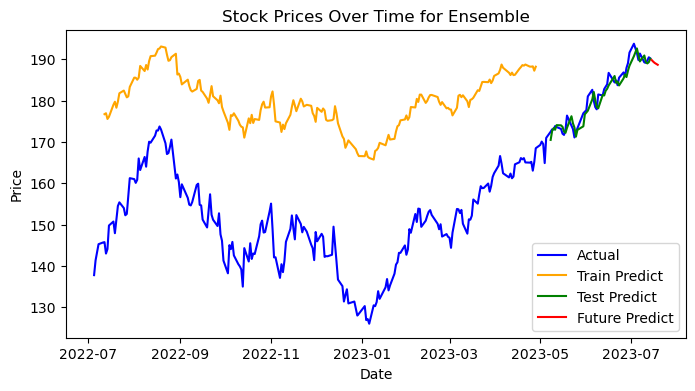

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'dates', 'stock_open', 'train_predict', 'test_predict' are defined
dates = np.array(index)
stock_open = np.array(stock_open)
train_predict = np.array(train_predict)
test_predict = np.array(test_predict)

# Create empty arrays for the plot
trainPredictPlot = np.empty_like(stock_open)
trainPredictPlot[:] = np.nan
trainPredictPlot[n_steps:len(train_predict)+n_steps] = train_predict.flatten()

testPredictPlot = np.empty_like(stock_open)
testPredictPlot[:] = np.nan
testPredictPlot[len(train_predict)+(n_steps*2):len(train_predict)+(n_steps*2)+len(test_predict)] = test_predict.flatten()

# Flatten future_predict
future_predict = future_predict.flatten()

# Create an array for the future prediction dates
future_dates = np.arange(dates[-1] + np.timedelta64(1, 'D'), dates[-1] + np.timedelta64(window_size + 1, 'D'), np.timedelta64(1, 'D'))

# Create an array for the plot
futurePredictPlot = np.empty_like(np.concatenate((stock_open, np.full(window_size, np.nan))))
futurePredictPlot[:] = np.nan
futurePredictPlot[len(train_predict) + (n_steps * 2) + len(test_predict):] = future_predict

# Plotting
plt.figure(figsize=(8,4))
plt.plot(np.concatenate((dates, future_dates)), np.concatenate((stock_open, np.full(window_size, np.nan))), color='blue', label='Actual')
plt.plot(dates, trainPredictPlot, color='orange', label='Train Predict')
plt.plot(dates, testPredictPlot, color='green', label='Test Predict')
plt.plot(np.concatenate((dates, future_dates)), futurePredictPlot, color='red', label='Future Predict')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices Over Time for Ensemble')
plt.legend()
plt.show()


In [31]:
future_predict

array([189.81342039, 189.43292693, 189.12200483, 188.90077197,
       188.68021067])